<a href="https://colab.research.google.com/github/johnantonn/deep-learning-practice/blob/main/linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A linear classifier using pure TensorFlow

This notebook implements a linear classifier from scratch using TensorFlow.

In [9]:
import numpy as np
import tensorflow as tf

In [4]:
# number of samples per class
num_samples_per_class = 1000

# negative class samples
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

# positive class samples
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [5]:
# generate two classes of 2D random points
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [7]:
# generate the corresponding targets (0, 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

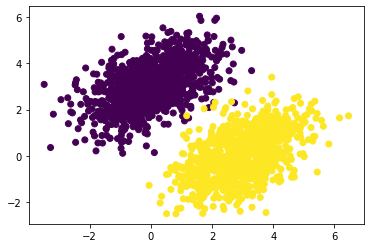

In [8]:
# visualize the two point clusters
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [10]:
# linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [11]:
# forward pass function
def model(inputs):
  return tf.matmul(inputs, W) + b

In [13]:
# mean squared error loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [12]:
# training step function
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [14]:
# batch training loop
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.2458
Loss at step 1: 0.3781
Loss at step 2: 0.1574
Loss at step 3: 0.1234
Loss at step 4: 0.1122
Loss at step 5: 0.1043
Loss at step 6: 0.0973
Loss at step 7: 0.0910
Loss at step 8: 0.0853
Loss at step 9: 0.0800
Loss at step 10: 0.0752
Loss at step 11: 0.0709
Loss at step 12: 0.0669
Loss at step 13: 0.0632
Loss at step 14: 0.0599
Loss at step 15: 0.0568
Loss at step 16: 0.0540
Loss at step 17: 0.0515
Loss at step 18: 0.0492
Loss at step 19: 0.0471
Loss at step 20: 0.0451
Loss at step 21: 0.0434
Loss at step 22: 0.0417
Loss at step 23: 0.0403
Loss at step 24: 0.0389
Loss at step 25: 0.0377
Loss at step 26: 0.0366
Loss at step 27: 0.0356
Loss at step 28: 0.0346
Loss at step 29: 0.0338
Loss at step 30: 0.0330
Loss at step 31: 0.0323
Loss at step 32: 0.0316
Loss at step 33: 0.0310
Loss at step 34: 0.0305
Loss at step 35: 0.0300
Loss at step 36: 0.0295
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0284


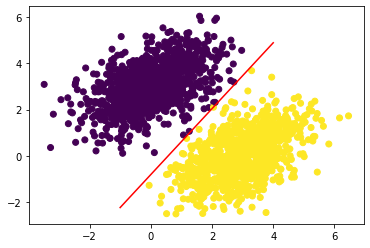

In [16]:
# predictions
predictions = model(inputs)

# plot classifier line
#
# generate 100 regularly spaced numbers between -1 and 4
x = np.linspace(-1, 4, 100)
# line equation
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
# plot line with red color
plt.plot(x, y, "-r")
# plot the model's predictions on the same plot
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
# plot
plt.show()